In [15]:
import pandas as pd

df_gisette_train = pd.read_csv('./GISETTE/gisette_train.data', header=None, sep=" ")
df_gisette_train = df_gisette_train.iloc[:,0:5000]
df_gisette_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0


In [32]:
df_gisette_train_labels = pd.read_csv('./GISETTE/gisette_train.labels', header=None)
df_gisette_train_labels.head()

label_df = df_gisette_train_labels.iloc[:,0]
label_df.head()

0    1
1   -1
2    1
3    1
4    1
Name: 0, dtype: int64

In [14]:
print("df_gisette_train\n",df_gisette_train.describe(),"\n")
print("df_gisette_train_labels\n",df_gisette_train_labels.describe())


df_gisette_train
               0            1            2            3            4     \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean    111.022833    11.251000   173.261167     0.951000    15.169167   
std     284.848291    91.448864   341.759463    25.771877   109.238579   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     999.000000   999.000000   999.000000   983.000000   999.000000   

              5            6            7            8            9     ...  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000  ...   
mean     50.209333    15.206333   323.073167     2.207667   146.355667  ...   
std     194.682629   106.963813   418.413159    39.746428   317.863306  ...   

In [35]:
from sklearn.preprocessing import StandardScaler

x = df_gisette_train.values
x = StandardScaler().fit_transform(x) # could also do StandardScaler().fit_transform(feature_df)
x

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [36]:
import numpy as np

np.mean(x), np.std(x)

(-2.17544500931884e-19, 0.9954898291795854)

In [38]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_gisette_train = PCA(n_components=3)
principalComponents_gisette_train = pca_gisette_train.fit_transform(x)

principal_gisette_train_df = pd.DataFrame(data = principalComponents_gisette_train \
        , columns = ['principal component 1', 'principal component 2', 'PC3'])
principal_gisette_train_df

,principal component 1,principal component 2,PC3
0,27.930784,6.382445,20.432025
1,18.516547,-9.880338,-9.772327
2,10.245869,-13.196287,-10.957572
3,11.002963,-3.281704,4.382137
4,-13.678348,-3.769059,-1.469824
...,...,...,...
5995,-5.267370,7.004981,-2.530725
5996,-10.807341,1.528852,-1.888643
5997,4.001839,-12.656032,-6.139718
5998,-4.213523,-13.101277,3.872164


In [41]:
pca_gisette_train.explained_variance_ratio_

array([0.02883488, 0.02258951, 0.01658598])

<Figure size 432x288 with 0 Axes>

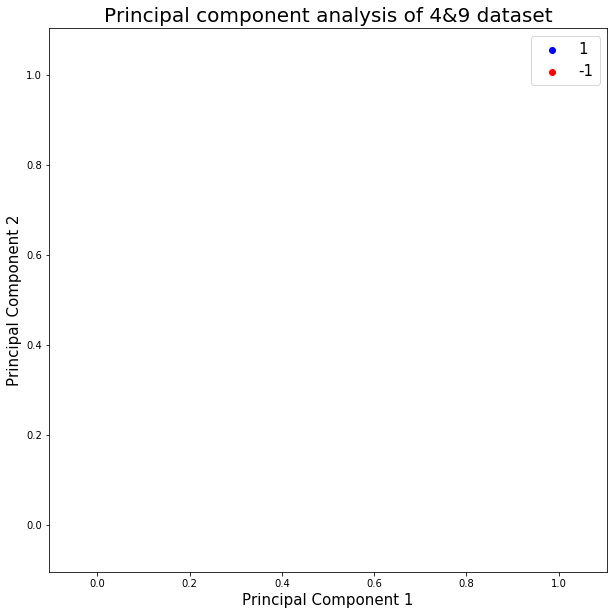

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('Principal component analysis of 4&9 dataset', fontsize=20)
targets = ['1', '-1']
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_gisette_train_df.loc[indicesToKeep, 'principal component 1'],
               principal_gisette_train_df.loc[indicesToKeep, 'principal component 2'],
               c = color)
plt.legend(targets,prop={'size': 15})

In [43]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.6f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.028835
 1: 0.022590
 2: 0.016586
 3: 0.016164
 4: 0.012354
 5: 0.011363
 6: 0.010197
 7: 0.008763
 8: 0.007237
 9: 0.006943
10: 0.006453
11: 0.005613
12: 0.005235
13: 0.004909
14: 0.004707
15: 0.004382
16: 0.004042
17: 0.003886
18: 0.003695
19: 0.003608
20: 0.003462
21: 0.003334
22: 0.003305
23: 0.003188
24: 0.002926
25: 0.002879
26: 0.002768
27: 0.002741
28: 0.002657
29: 0.002598
30: 0.002538
31: 0.002436
32: 0.002411
33: 0.002290
34: 0.002247
35: 0.002203
36: 0.002107
37: 0.002089
38: 0.002065
39: 0.001984
40: 0.001969
41: 0.001926
42: 0.001906
43: 0.001869
44: 0.001862
45: 0.001794
46: 0.001767
47: 0.001748
48: 0.001708
49: 0.001662
50: 0.001633
51: 0.001608
52: 0.001574
53: 0.001570
54: 0.001552
55: 0.001522
56: 0.001496
57: 0.001480
58: 0.001447
59: 0.001443
60: 0.001413
61: 0.001386
62: 0.001376
63: 0.001353
64: 0.001347
65: 0.001333
66: 0.001324
67: 0.001307
68: 0.001303
69: 0.001286
70: 0.001273
71: 0.001260
72: 0.001239
73: 0.001214
74: 0.001201
75: 0.001188
76: 0.001176

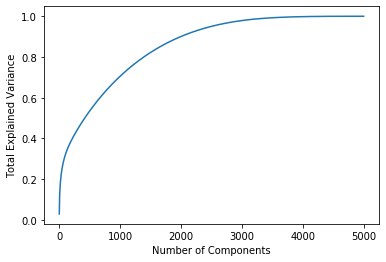

In [44]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

In [ ]:
a
